In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "/Users/elshaddhai/personalproject/machine_learning/fast_ai/fastai/old")

In [4]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [5]:
set_plot_sizes(12,14,16)

In [6]:
PATH = "data/bulldozers/"

df_raw = pd.read_feather('tmp/bulldozers-raw')
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

In [7]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [8]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [9]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [10]:
df_raw.T

,0,1,2,3,4,5,6,7,8,9,...,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,...,6333290,6333302,6333307,6333311,6333335,6333336,6333337,6333338,6333341,6333342
SalePrice,11.0974,10.9508,9.21034,10.5584,9.30565,10.1849,9.95228,10.2036,9.97581,11.0821,...,9.21034,9.04782,9.21034,9.15905,9.04782,9.25913,9.30565,9.3501,9.10498,8.95545
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,...,1843374,1825337,1821747,1828862,1798293,1840702,1830472,1887659,1903570,1926965
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,21437,21437,21437,21437,21435,21439,21439,21439,21435,21435
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,1,1,1,2,2
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000,...,2005,2005,2005,2006,2005,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,68,4640,2838,3486,722,508,11540,4883,302,20700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00,...,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


For model interpretation, there's no need to use the full dataset on each tree - using a subset will be both faster, and also provide better interpretability (since an overfit model will not provide much variance across trees).

In [11]:
set_rf_samples(50000)

In [12]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20682014366995696, 0.2474513115979019, 0.9106035038773668, 0.8906478077096167, 0.8947821994071911]


In [13]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 2.29 s, sys: 108 ms, total: 2.4 s
Wall time: 2.42 s


(9.269138676363442, 0.28757696811733885)

In [14]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 120 ms, sys: 115 ms, total: 235 ms
Wall time: 1.62 s


(9.269138676363442, 0.28757696811733885)

We can see that different trees are giving different estimates this this auction. In order to see how prediction confidence varies, we can add this into our dataset.

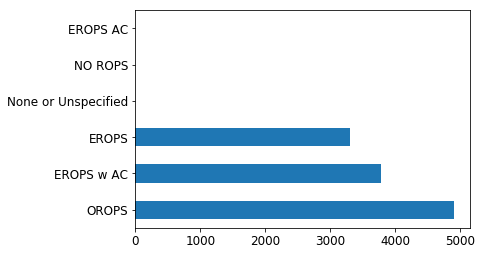

In [15]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

In [16]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.843497,0.269850
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.582057,0.265562
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.694877,0.216982


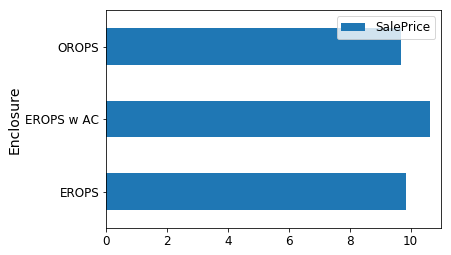

In [17]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

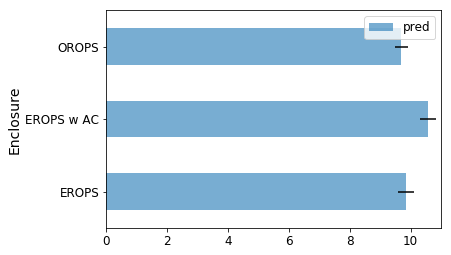

In [18]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

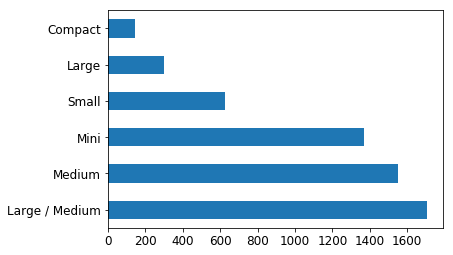

In [19]:
raw_valid.ProductSize.value_counts().plot.barh();

In [21]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.862003,0.356850
Large,10.470589,10.398769,0.358029
Large / Medium,10.691871,10.653138,0.293445
Medium,10.681511,10.626001,0.296862
Mini,9.535147,9.560891,0.243905
Small,10.324448,10.321796,0.313449


In [22]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Compact           0.036184
Large             0.034430
Small             0.030368
Medium            0.027937
Large / Medium    0.027545
Mini              0.025511
dtype: float64

# Feature importance


In [23]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.166286
38,Coupler_System,0.111610
14,ProductSize,0.086040
15,fiProductClassDesc,0.083209
8,saledate,0.070972
2,ModelID,0.058892
11,fiSecondaryDesc,0.052652
39,Grouser_Tracks,0.046391
20,Enclosure,0.043268
40,Hydraulics_Flow,0.041880


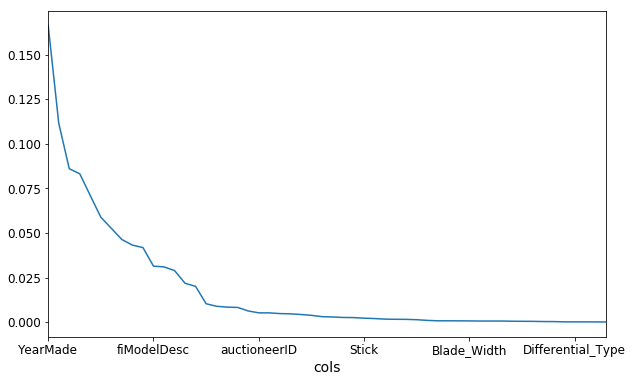

In [24]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [25]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

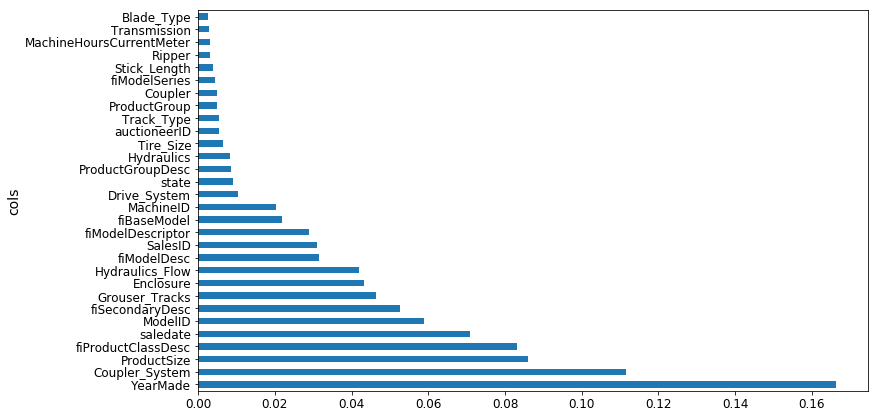

In [26]:
plot_fi(fi[:30]);

In [27]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

22

In [28]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [29]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20755677243489998, 0.24300107880198188, 0.9099655650234184, 0.8945456795841731, 0.8945392161098296]


In [32]:
fi = rf_feat_importance(m, df_keep); fi[:10]

,cols,imp
0,YearMade,0.174429
1,Coupler_System,0.110780
2,ProductSize,0.110328
3,fiProductClassDesc,0.093292
4,saledate,0.072650
7,Grouser_Tracks,0.057438
5,ModelID,0.057098
6,fiSecondaryDesc,0.048761
11,SalesID,0.034986
10,fiModelDesc,0.033016


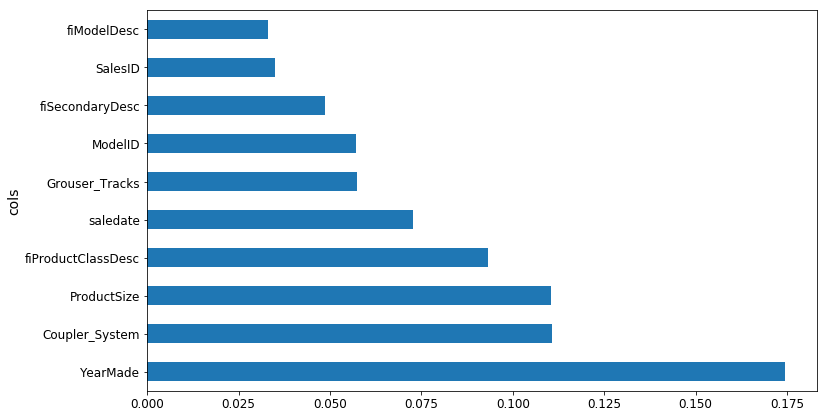

In [33]:
plot_fi(fi[:10]);

In [37]:
to_keep = fi[fi.imp>0.050].cols; len(to_keep)

7

In [38]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [39]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.22206927785185726, 0.24790266586353696, 0.8969348625794604, 0.8902485243788165, 0.8859365867931046]
